Nama : Irma Dwiyanti

NIM : 1227050059

UTS Praktikum Pembelajaran Mesin B

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Data**

In [4]:
file_path = '/content/drive/MyDrive/SEM6/Prak. Pembelajaran Mesin/UTS/citrus.csv'
data = pd.read_csv(file_path)

In [5]:
# Tampilkan beberapa data awal
print("Data Sample:\n", data.head())

Data Sample:
      name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


Eksplorasi Data

In [6]:
print("\nInfo Dataset:")
print(data.info())

print("\nDistribusi Label:")
print(data['name'].value_counts())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Distribusi Label:
name
orange        5000
grapefruit    5000
Name: count, dtype: int64


**Preprocessing**

In [7]:
# Encode label: orange = 0, grapefruit = 1
data['label'] = data['name'].map({'orange': 0, 'grapefruit': 1})

In [8]:
# Pilih fitur dan target
X = data[['diameter', 'weight', 'red', 'green', 'blue']]
y = data['label']

**Split Dataset**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Decision Tree**

In [19]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Evaluasi Model**

In [20]:
y_pred = model.predict(X_test)

print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi Model: 0.892

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1012
           1       0.87      0.91      0.89       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000


Confusion Matrix:
 [[880 132]
 [ 84 904]]


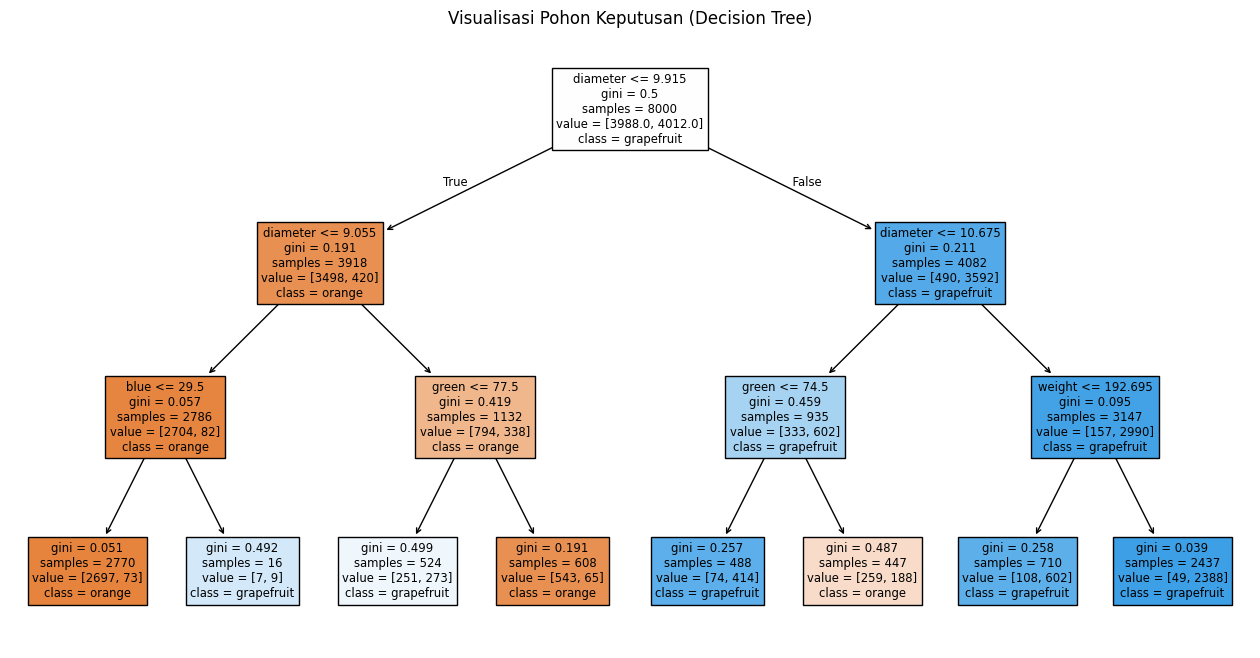

In [21]:
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=['orange', 'grapefruit'], filled=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

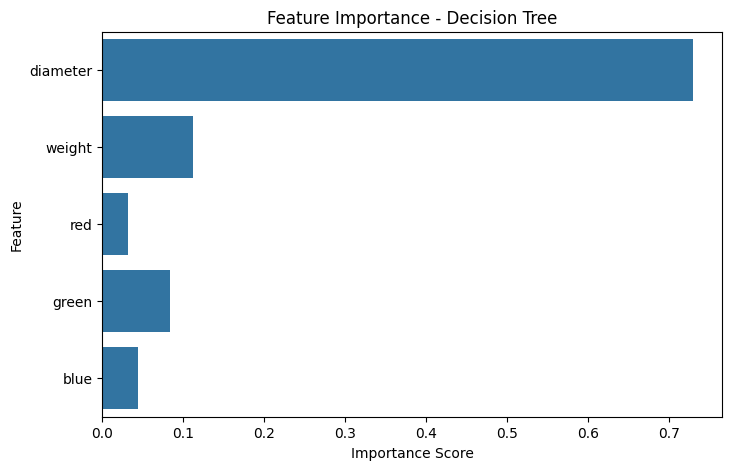

In [13]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Prediksi dengan Data Baru

In [17]:
# Data baru untuk beberapa buah
new_data_batch = pd.DataFrame([
    {'diameter': 6.3, 'weight': 165, 'red': 210, 'green': 180, 'blue': 90},
    {'diameter': 12.13, 'weight': 211.13, 'red': 135, 'green': 62, 'blue': 6}
])

predictions = model.predict(new_data_batch)
labels = ['orange' if p == 0 else 'grapefruit' for p in predictions]

for i, label in enumerate(labels):
    print(f"Prediksi buah ke-{i+1}: {label}")


Prediksi buah ke-1: orange
Prediksi buah ke-2: grapefruit


**💡 Kesimpulan**

Berdasarkan hasil eksplorasi dan pemodelan menggunakan algoritma Decision Tree Classifier pada dataset https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit, dapat disimpulkan hal-hal berikut:


- Fitur yang paling berkontribusi dalam proses klasifikasi adalah diameter, dengan skor pentingnya jauh lebih tinggi dibandingkan fitur lainnya. Hal ini menunjukkan bahwa ukuran diameter buah sangat menentukan dalam membedakan antara jeruk dan grapefruit.

- Model Decision Tree yang dibangun menghasilkan akurasi sebesar 94.35%, dengan performa yang cukup baik dilihat dari nilai precision, recall, dan f1-score yang semuanya berada di atas 0.93.

- Confusion matrix menunjukkan bahwa prediksi model cukup seimbang untuk kedua kelas, dengan kesalahan klasifikasi yang tergolong rendah.

- Visualisasi pohon keputusan memberikan gambaran struktural bagaimana model memutuskan label berdasarkan fitur-fiturnya. Kompleksitas pohon menunjukkan banyaknya aturan yang dipertimbangkan.

- Hasil prediksi dengan data baru juga berhasil menjalankan prediksi sesuai data.


Jadi model yang dibangun sangat efektif dalam membedakan buah orange dan grapefruit hanya berdasarkan atribut fisik dan warna. Keberhasilan ini menunjukkan potensi Decision Tree dalam menangani masalah klasifikasi sederhana namun padat informasi, seperti pada kasus ini.

